# Supervised Learning - Linear Regression

Do you remember the recipe for Machine Learning? Let me remind you once again!

* Define Problem : We start by defining the problem we are trying to solve. This can be as simple as prediction of your next semester's result based on your previous results.
* Collect Data : Next step is to collect relevant data based on the problem definition. This can be your grades in different semesters.
* Prepare Data : The data collected for our problem is preprocessed. This can be removing redundant grades and replacing the missing ones.
* Select Model(Algorithm) : After the data is ready, we proceed to select the machine learning model. The selection is based on the problem type e.g. classification, regression etc and the data that is available to us. The model can be linear regression model in our case.
* Train Model : The selected model is then trained to learn from the data we have collected.
* Evaluate Model : Final step is to evaluate the model that we have trained for accuracy and view the results.
This is exactly what we are going to do here.

## Step 1 - Define Problem

The data scientists at AwesomeMart have collected 2013 sales data for 1559 products across 10 stores in different cities. The aim is to build a predictive model and find out the sales of each product at a particular store using machine learning.

Using this model, AwesomeMart will try to understand the properties of products and stores which play a key role in increasing sales.

## Step 2 - Collect & Prepare Data¶

Step 2.1 - Import Data & Primary Data Analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Read files:
df = pd.read_csv("data.csv")


Now let us do some quick data analysis!

In [29]:
df.head()

,Item_Outlet_Sales,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,3735.1380,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,443.4228,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,2097.2700,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,732.3800,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,994.7052,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [30]:
df.shape

(8523, 12)

In [31]:
df.describe()

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,8523.000000,7060.000000,8523.000000,8262.000000,8523.000000
mean,2181.288914,12.857645,0.066132,141.031456,1997.831867
std,1706.499616,4.643456,0.051598,62.360424,8.371760
min,33.290000,4.555000,0.000000,31.290000,1985.000000
25%,834.247400,8.773750,0.026989,93.719900,1987.000000
50%,1794.331000,12.600000,0.053931,143.014100,1999.000000
75%,3101.296400,16.850000,0.094585,185.826600,2004.000000
max,13086.964800,21.350000,0.328391,266.888400,2009.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

    * Average cost of an item is 140
    * AwesomeMart was first established at 1985 
    * They have a max sales of 13,086 and min of 33
    * There are about 8,523 products in store and 12 features.
    
For the non-numerical values (e.g. Item_Fat_Content, Item_Type etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:

In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Step 2.2 - Finding & Imputing Missing Values

In [33]:
df.isnull().sum()

Item_Outlet_Sales               0
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                     234
Item_MRP                      261
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [34]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 2:3])
df.iloc[:, 2:3] = imputer.transform(df.iloc[:, 2:3])

In [35]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 6:7])
df.iloc[:, 6:7] = imputer.transform(df.iloc[:, 6:7])

In [36]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')

In [37]:
df['Item_Type'] = df['Item_Type'].fillna('Breads')

In [38]:
df.isnull().sum()

Item_Outlet_Sales            0
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Awesome! No we don't have any missing values.

## Step 2.3 - Data Visualization

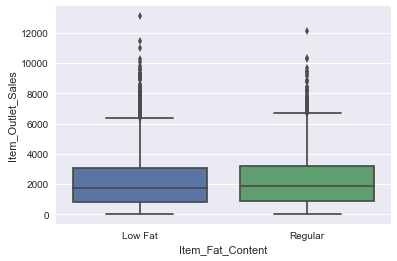

In [39]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df)

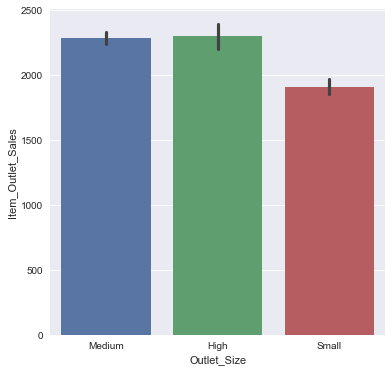

In [40]:
plt.figure(figsize=(6,6))
sns.barplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df)

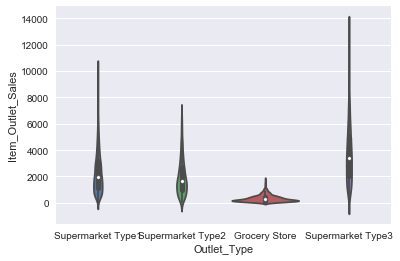

In [41]:
sns.violinplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales',  data = df)

## Step 3 - Modeling
Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories

In [42]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = df.dtypes[df.dtypes == 'object'].index
categorical_variables

Index([u'Item_Identifier', u'Item_Fat_Content', u'Item_Type',
       u'Outlet_Identifier', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type'],
      dtype='object')

In [43]:
#Conv them using Label Encoder
le = LabelEncoder()
for var in categorical_variables:
    df[var] = le.fit_transform(df[var])

df.head()

,Item_Outlet_Sales,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,3735.1380,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,443.4228,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,2097.2700,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,732.3800,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0
4,994.7052,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [44]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [47]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
print round(r2_score(y_test, y_pred)*100, 2) , '%'

50.21 %
